In [6]:
%run supportvectors-common.ipynb



<div style="color:#aaa;font-size:8pt">
<hr/>

 </blockquote>
 <hr/>
</div>



# The power of pretrained models

There exists a very rich library of pre-trained models the provide remarkable predictive performance; quite often they can be used as-in. At other times, they can used by training only a small subset of the parameters (such as in the last layer), or with small modification. Since training of some of the models is computationally prohibitive, having them trained on well-known datasets and available to us represents a huge time and computation saver.

In this notebook, we will learn to use the pre-trained models that have been trained on the massive ImageNet dataset. In this simple exercise, we will not perform any modifications to the model or any partial retraining.

In this exercise, we give an image to a few of the pre-trained models, and see how well they perform in identifying the object. This is thus a classification task, where the input is an image, and the output is a label, such as "parrot". The labels comprise of the Stanford's Wordnet database.

## Lab Exercise

<span style="color:red">**WARNING: Make sure that you have enough disk-space on your machine before you run this notebook -- the models are huge and take considerable disk-space. Also, based on your network bandwidth, it may take from a few seconds to a few minutes to download the pre-trained models** </span>

* Change the values of the sample image, but feeling it different pictures. See how well it performs.
* Observe how well each of the models performs
* Notice that some of the high-performing models are huge! (You will notice it while the models are being downloaded to your machine for the first time. 
* Read the source-code of ImageNetRecognizer to understand how it is working. If possible, put breakpoints and see how the execution proceeds. You can run the code in any of the python IDEs. Pycharm Community Edition works very well for this purposes (and of-course, if you have the Professional version, nice!)



In [8]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
%matplotlib inline
from torchvision import models
from PIL import Image
import urllib.request

from svlearn.transfer.imagenet import ImageNetRecognizer

## Create the recognizer

Let us create the recognizer, and list the available models in torchvision.models


In [9]:
recognizer = ImageNetRecognizer ()
recognizer.tabulate_models()

******************** CLASSES **********************

AlexNet
AlexNet_Weights
ConvNeXt
ConvNeXt_Base_Weights
ConvNeXt_Large_Weights
ConvNeXt_Small_Weights
ConvNeXt_Tiny_Weights
DenseNet
DenseNet121_Weights
DenseNet161_Weights
DenseNet169_Weights
DenseNet201_Weights
EfficientNet
EfficientNet_B0_Weights
EfficientNet_B1_Weights
EfficientNet_B2_Weights
EfficientNet_B3_Weights
EfficientNet_B4_Weights
EfficientNet_B5_Weights
EfficientNet_B6_Weights
EfficientNet_B7_Weights
EfficientNet_V2_L_Weights
EfficientNet_V2_M_Weights
EfficientNet_V2_S_Weights
GoogLeNet
GoogLeNetOutputs
GoogLeNet_Weights
Inception3
InceptionOutputs
Inception_V3_Weights
MNASNet
MNASNet0_5_Weights
MNASNet0_75_Weights
MNASNet1_0_Weights
MNASNet1_3_Weights
MaxVit
MaxVit_T_Weights
MobileNetV2
MobileNetV3
MobileNet_V2_Weights
MobileNet_V3_Large_Weights
MobileNet_V3_Small_Weights
RegNet
RegNet_X_16GF_Weights
RegNet_X_1_6GF_Weights
RegNet_X_32GF_Weights
RegNet_X_3_2GF_Weights
RegNet_X_400MF_Weights
RegNet_X_800MF_Weights
RegNet_

## Inference using the pre-trained models
Now, let us take some of the models, and apply it to our sample image.

In [10]:
model_builders =[models.resnet18, 
                 models.resnet152, 
                 models.vgg11, 
                 models.vgg19, 
                 models.alexnet, 
                 models.densenet201,
                 models.inception_v3]

pretrained_models = [model_builder(pretrained=True, progress=True) for model_builder in model_builders]
model_names = [item.__name__ for item in model_builders]
print(model_names)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/asif/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████████████████████████████████████████████████████████████████| 44.7M/44.7M [00:00<00:00, 64.7MB/s]
Downloading: "https://download.pytorch.org/models/vgg11-8a719046.pth" to /home/asif/.cache/torch/hub/checkpoints/vgg11-8a719046.pth
100%|████████████████████████████████████████████████████████████████████████| 507M/507M [00:05<00:00, 90.8MB/s]
Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to /home/asif/.cache/torch/hub/checkpoints/vgg19-dcbb9e9d.pth
100%|████████████████████████████████████████████████████████████████████████| 548M/548M [00:06<00:00, 82.4MB/s]
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /home/asif/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|████████████████████████████████████████████████████████████████████████| 233M/233M [00:02<00:00, 95.4MB/s]
Do

['resnet18', 'resnet152', 'vgg11', 'vgg19', 'alexnet', 'densenet201', 'inception_v3']


### A sample image

Take any sample image from the internet, and let the models make an inference on what it is:
    

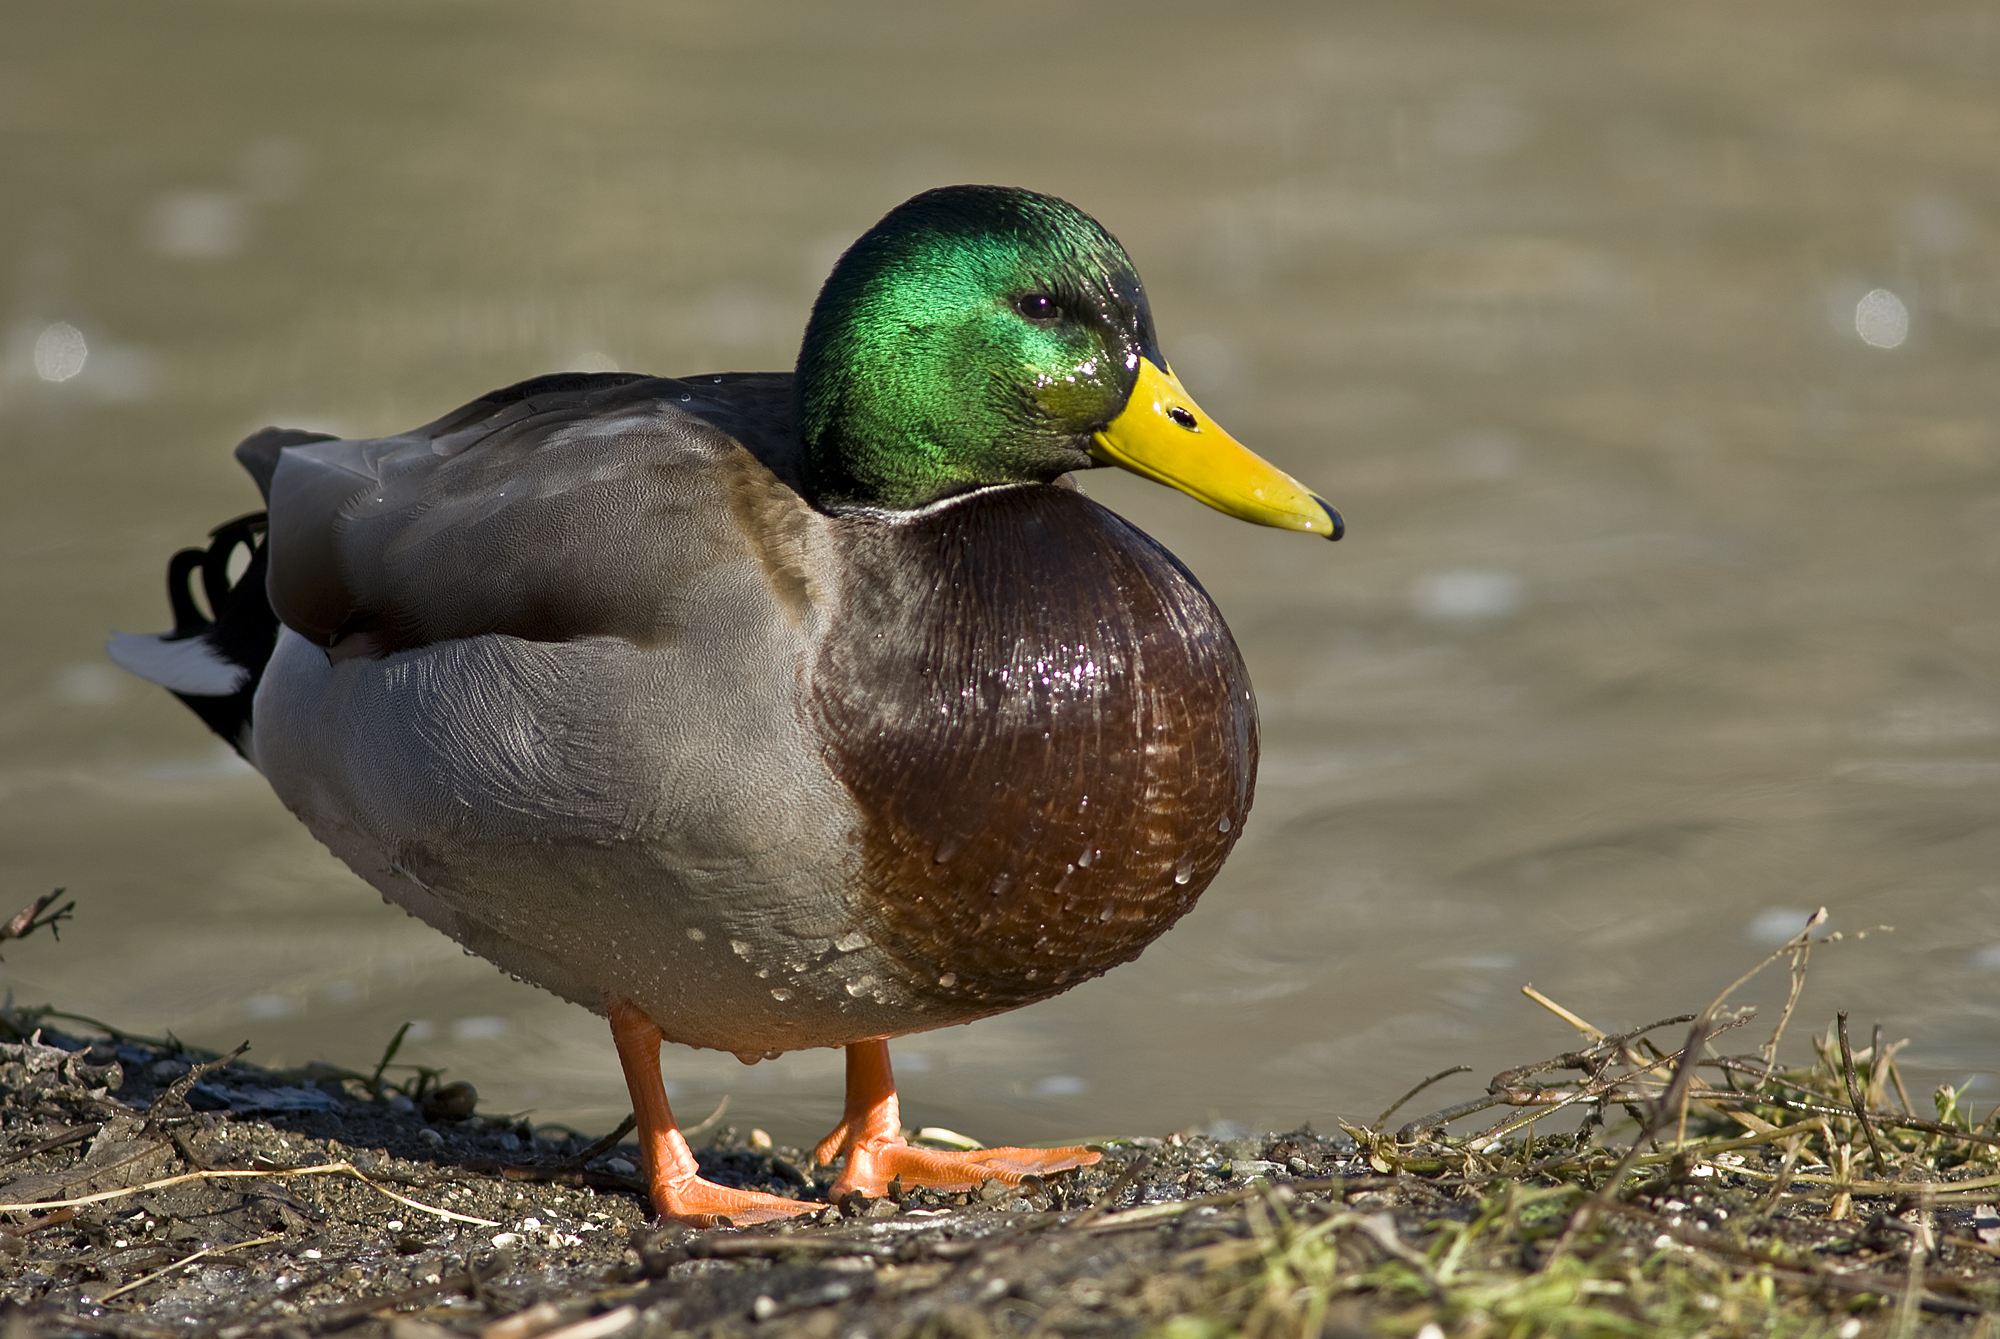

In [4]:
# To load from a local file
# img = Image.open('/home/asif/dog.jpg')

# To load from a url

dog_url = 'https://upload.wikimedia.org/wikipedia/commons/f/f0/Goldensondika.jpg'
duck_url = 'https://upload.wikimedia.org/wikipedia/commons/2/24/Male_mallard_duck_2.jpg'

url = duck_url
img = Image.open(urllib.request.urlopen(url))
img

In [5]:
# Let us now use each of these models to make an inference on the image, and then display the top-5 guesses.

columns = ['Model',
           'Guess-1',
           'Guess-2',
           'Guess-3',
           'Guess-4',
           'Guess-5']
df = pd.DataFrame(columns=columns)

for model, name in zip (pretrained_models, model_names):
    classifier = ImageNetRecognizer(model)
    result = classifier.classify_image(img)
    guesses = classifier.top_n_guesses(result, 5)

    values = [name]

    for guess in guesses:
        values.append(str(guess))

    df.loc[len(df)] = values
    print("\n\n")

  1 ==> DRAKE with a probability of 99.99832916259766
  2 ==> AMERICAN COOT, MARSH HEN, MUD HEN, WATER HEN, FULICA AMERICANA with a probability of 0.000865780224557966
  3 ==> GOOSE with a probability of 0.0004231105267535895
  4 ==> RED-BREASTED MERGANSER, MERGUS SERRATOR with a probability of 0.00023802326177246869
  5 ==> EUROPEAN GALLINULE, PORPHYRIO PORPHYRIO with a probability of 7.486228423658758e-05



  1 ==> DRAKE with a probability of 99.87395477294922
  2 ==> RED-BREASTED MERGANSER, MERGUS SERRATOR with a probability of 0.056877732276916504
  3 ==> GOOSE with a probability of 0.0267336443066597
  4 ==> AMERICAN COOT, MARSH HEN, MUD HEN, WATER HEN, FULICA AMERICANA with a probability of 0.013431280851364136
  5 ==> EUROPEAN GALLINULE, PORPHYRIO PORPHYRIO with a probability of 0.0063482229597866535



  1 ==> DRAKE with a probability of 100.0
  2 ==> GOOSE with a probability of 3.900410774804186e-06
  3 ==> RED-BREASTED MERGANSER, MERGUS SERRATOR with a probability of 1.16027

In [6]:
df

Model                       Guess-1  \
0      resnet18  ('DRAKE', 99.99832916259766)   
1     resnet152  ('DRAKE', 99.87395477294922)   
2         vgg11              ('DRAKE', 100.0)   
3         vgg19  ('DRAKE', 99.99947357177734)   
4       alexnet              ('DRAKE', 100.0)   
5   densenet201  ('DRAKE', 99.25260925292969)   
6  inception_v3  ('DRAKE', 99.99968719482422)   

                                             Guess-2  \
0  ('AMERICAN COOT, MARSH HEN, MUD HEN, WATER HEN...   
1  ('RED-BREASTED MERGANSER, MERGUS SERRATOR', 0....   
2                   ('GOOSE', 3.900410774804186e-06)   
3  ('RED-BREASTED MERGANSER, MERGUS SERRATOR', 0....   
4  ('AMERICAN COOT, MARSH HEN, MUD HEN, WATER HEN...   
5  ('RED-BREASTED MERGANSER, MERGUS SERRATOR', 0....   
6  ("PLUNGER, PLUMBER'S HELPER", 3.55281845259014...   

                                             Guess-3  \
0                   ('GOOSE', 0.0004231105267535895)   
1                      ('GOOSE', 0.0267336443066597)   
2  ('RED-BREASTED MERGANSER, MERGUS SERRATOR', 1....   
3                  ('GOOSE', 0.00017131719505414367)   
4              ('PARTRIDGE', 1.5362946470531824e-08)   
5  ('AMERICAN COOT, MARSH HEN, MUD HEN, WATER HEN...   
6     ('LAKESIDE, LAKESHORE', 2.953789589810185e-05)   

                                             Guess-4  \
0  ('RED-BREASTED MERGANSER, MERGUS SERRATOR', 0....   
1  ('AMERICAN COOT, MARSH HEN, MUD HEN, WATER HEN...   
2  ('EUROPEAN GALLINULE, PORPHYRIO PORPHYRIO', 9....   
3  ('AMERICAN COOT, MARSH HEN, MUD HEN, WATER HEN...   
4  ('EUROPEAN GALLINULE, PORPHYRIO PORPHYRIO', 1....   
5                     ('GOOSE', 0.07483095675706863)   
6  ('RED-BREASTED MERGANSER, MERGUS SERRATOR', 2....   

                                             Guess-5  
0  ('EUROPEAN GALLINULE, PORPHYRIO PORPHYRIO', 7....  
1  ('EUROPEAN GALLINULE, PORPHYRIO PORPHYRIO', 0....  
2  ('AMERICAN COOT, MARSH HEN, MUD HEN, WATER HEN...  
3     ('LAKESIDE, LAKESHORE', 3.927962825400755e-05)  
4                ('PEACOCK', 3.3306108981889793e-09)  
5        ('WATER OUZEL, DIPPER', 0.0660625621676445)  
6           ('CROQUET BALL', 2.2116701074992307e-05)